In [1]:
from datetime import datetime
import matplotlib.pyplot as plt
from tqdm import tqdm
import numpy as np

from utils import run_smogn, read_datacube

## Calculate runtime with original implementation

Running SMOGN with increasing input sizes: : 11it [5:28:42, 1792.95s/it]                           


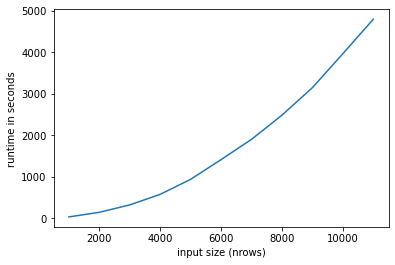

In [5]:
full_data = read_datacube("../data/Arnhem_clean_2003-2004.nc", silent=True)
full_size = len(full_data)
df_size = 1000
size_growth = 1000

full_data = full_data.sample(frac=1)

runtimes2 = []
sizes2 = []

with tqdm(total=(full_size-df_size)/size_growth) as pbar:
    pbar.set_description("Running SMOGN with increasing input sizes")
    while df_size <= full_size:
        df = full_data.head(df_size)
        startTime = datetime.now()
        run_smogn(None, parallel=False, silent=True, features=df)
        runTime = datetime.now() - startTime
        runtimes2.append(runTime.total_seconds())
        sizes2.append(len(df))
        df_size += size_growth
        pbar.update(1)

plt.plot(sizes2, runtimes2)
plt.title("SMOGN runtime with original implementation")
plt.xlabel("input size (nrows)")
plt.ylabel("runtime in seconds")
plt.show()

## Calculate runtime with improved implementation

Running SMOGN with increasing input sizes:  98%|█████████▊| 48/48.788 [22:39<00:46, 59.50s/it]/home/user1/anaconda3/envs/smogn/lib/python3.9/site-packages/tqdm/std.py:532: TqdmWarning: clamping frac to range [0, 1]
  full_bar = Bar(frac,
Running SMOGN with increasing input sizes: 100%|██████████| 49/48.788 [23:44<-1:59:54, 29.08s/it]


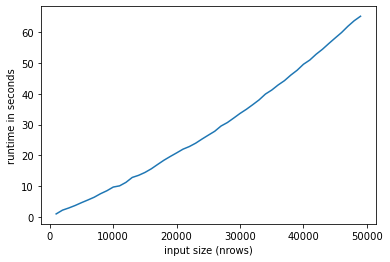

In [3]:
full_data = read_datacube("../data/australia_9y.nc", silent=True)
full_size = len(full_data)
df_size = 1000
size_growth = 1000

full_data = full_data.sample(frac=1)

runtimes = []
sizes = []

with tqdm(total=(full_size-df_size)/size_growth) as pbar:
    pbar.set_description("Running SMOGN with increasing input sizes")
    while df_size <= full_size:
        df = full_data.head(df_size)
        startTime = datetime.now()
        run_smogn(None, parallel=True, silent=True, features=df)
        runTime = datetime.now() - startTime
        runtimes.append(runTime.total_seconds())
        sizes.append(len(df))
        df_size += size_growth
        pbar.update(1)

plt.plot(sizes, runtimes)
plt.title("SMOGN runtime with improved implementation")
plt.xlabel("input size (nrows)")
plt.ylabel("runtime in seconds")
plt.show()

## Compare runtimes

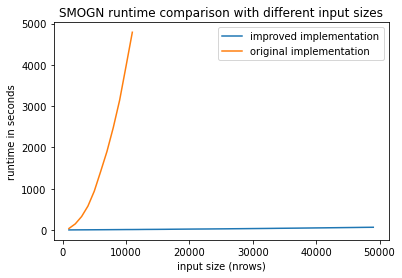

In [83]:
plt.plot(sizes, runtimes, label="improved implementation")
plt.plot(sizes2, runtimes2, label="original implementation")
plt.xlabel("input size (nrows)")
plt.ylabel("runtime in seconds")
plt.title("SMOGN runtime comparison with different input sizes")
plt.legend()
plt.show()

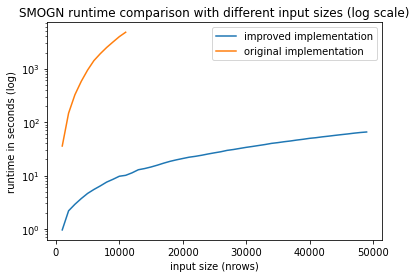

In [4]:
plt.plot(sizes, runtimes, label="improved implementation")
plt.plot(sizes2, runtimes2, label="original implementation")
plt.xlabel("input size (nrows)")
plt.ylabel("runtime in seconds (log)")
plt.yscale('log')
plt.title("SMOGN runtime comparison with different input sizes (log scale)")
plt.legend()
plt.show()

# ROUGH runtime estimations for larger data sets

Note: these are rough estimations and should not be taken as accurate representations of final performance. It is clear that there is some degree of error in these estimations, simply by the fact that the curve estimation does not come to the same conclusion as the improvement factor calculation. Take these with a grain of salt.

## Estimation by fitting curves

### Improved implementation

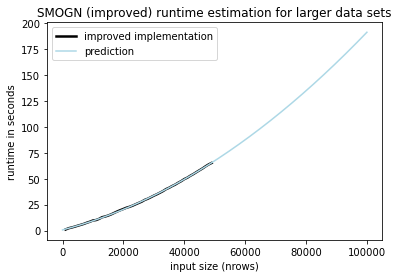

In [98]:
model = np.poly1d(np.polyfit(sizes, runtimes, 2))

polyline = np.linspace(1, 100000, 1000)
plt.plot(sizes, runtimes, label="improved implementation", color="black", linewidth=2.5)
plt.plot(polyline, model(polyline), color='lightblue', label="prediction")
plt.xlabel("input size (nrows)")
plt.ylabel("runtime in seconds")
plt.title("SMOGN (improved) runtime estimation for larger data sets")
plt.legend()
plt.show()

In [76]:
full_data = read_datacube("../data/australia_9y.nc", silent=True, select_north=False)
print("Improved implementation takes an estimated " + str(round(model(len(full_data))/60/60,1)) + " hours for full australia data set")

Improved implementation takes an estimated 4.9 hours for full australia data set


### Original implementation

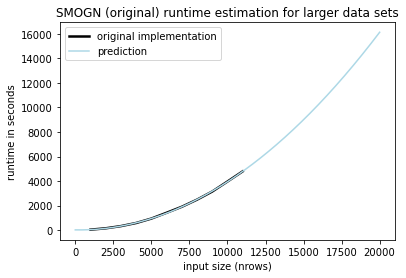

In [97]:
model = np.poly1d(np.polyfit(sizes2, runtimes2, 2))

polyline = np.linspace(1, 20000, 1000)
plt.plot(sizes2, runtimes2, label="original implementation", color="black", linewidth=2.5)
plt.plot(polyline, model(polyline), color='lightblue', label="prediction")
plt.xlabel("input size (nrows)")
plt.ylabel("runtime in seconds")
plt.title("SMOGN (original) runtime estimation for larger data sets")
plt.legend()
plt.show()

In [79]:
print("Original implementation takes an estimated " + str(round(model(len(full_data))/60/60,1)) + " hours for full australia data set")

Original implementation takes an estimated 16738.7 hours for full australia data set


## Estimation by calculating improvement factor

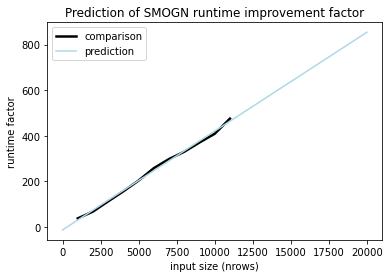

In [95]:
runtime_factor = []
runtime_factor_sizes = sizes[0:11]
for i in range(0,11):
    runtime_factor.append(runtimes2[i]/runtimes[i])

model = np.poly1d(np.polyfit(runtime_factor_sizes, runtime_factor, 1))

polyline = np.linspace(1, 20000, 1000)
plt.plot(runtime_factor_sizes, runtime_factor, label="comparison", color="black", linewidth=2.5)
plt.plot(polyline, model(polyline), color='lightblue', label="prediction")
plt.xlabel("input size (nrows)")
plt.ylabel("runtime factor")
plt.title("Prediction of SMOGN runtime improvement factor")
plt.legend()
plt.show()

In [96]:
print("Improved method is an estimated " + str(round(model(len(full_data)),2)) + " times faster on the full australia data set")

Improved method is an estimated 52382.51 times faster on the full australia data set
